# K-Nearest Neighbors (KNN) for Car Price Prediction

This notebook implements the K-Nearest Neighbors algorithm for predicting car prices using the cleaned car dataset.


In [2]:

import pandas as pd

import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
import pickle


## Load the Cleaned Dataset

We'll use the cleaned car dataset that was created in the Linear Regression notebook.


In [3]:

car = pd.read_csv('Cleaned Car.csv')
car.drop('Unnamed: 0', axis=1, inplace=True, errors='ignore')
car.head()


,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel


In [4]:

car.shape


(815, 6)

In [5]:

car.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 815 entries, 0 to 814
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        815 non-null    object
 1   company     815 non-null    object
 2   year        815 non-null    int64 
 3   Price       815 non-null    int64 
 4   kms_driven  815 non-null    int64 
 5   fuel_type   815 non-null    object
dtypes: int64(3), object(3)
memory usage: 38.3+ KB


In [6]:

car.describe()


,year,Price,kms_driven
count,815.000000,8.150000e+02,815.000000
mean,2012.442945,4.017933e+05,46277.096933
std,4.005079,3.815888e+05,34318.459638
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.900000e+05,56879.000000
max,2019.000000,3.100000e+06,400000.000000


## Data Preparation for KNN

KNN is sensitive to the scale of the features, so we'll need to standardize the numerical features.


In [7]:

X = car.drop(columns='Price')
y = car['Price']


In [9]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:

ohe = OneHotEncoder()
ohe.fit(X[['name', 'company', 'fuel_type']])

column_trans = make_column_transformer(
    (OneHotEncoder(categories=ohe.categories_), ['name', 'company', 'fuel_type']),
    (StandardScaler(), ['year', 'kms_driven']),
    remainder='passthrough'
)


## KNN Model Implementation

We'll implement the KNN algorithm and tune its hyperparameters to find the optimal value of k.


In [12]:

knn = KNeighborsRegressor()

pipe = make_pipeline(column_trans, knn)

pipe.fit(X_train, y_train)


y_pred = pipe.predict(X_test)


print(f"R² Score: {r2_score(y_test, y_pred):.4f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.4f}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.4f}")


R² Score: 0.5086
Mean Squared Error: 100075517184.4434
Mean Absolute Error: 134972.7816


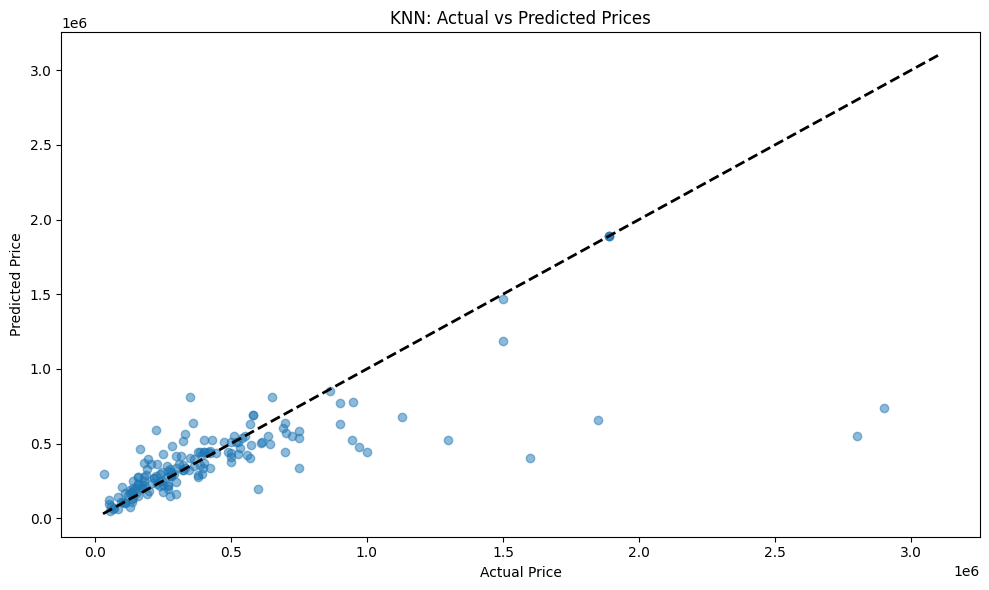

In [13]:

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('KNN: Actual vs Predicted Prices')
plt.tight_layout()
plt.show()


## Test the Model with a Sample Input

Let's test the model with a sample input to see how it predicts the price of a car.


In [17]:

sample_input = pd.DataFrame([
    ['Maruti Suzuki Swift', 'Maruti', 2019, 10000, 'Petrol']
], columns=['name', 'company', 'year', 'kms_driven', 'fuel_type'])


predicted_price = best_model.predict(sample_input)[0]
print(f"Predicted price for the sample car: ₹{predicted_price:.2f}")


Predicted price for the sample car: ₹431328.31
